# Лабораторная работа №3

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#### Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

Выведем статистику по датасету для числовых признаков:

In [95]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Посмотрим распределение категориального признака 'Extracurricular Activities':

In [96]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

И в процентах:

In [97]:
data['Extracurricular Activities'].value_counts(normalize=True) * 100

Extracurricular Activities
No     50.52
Yes    49.48
Name: proportion, dtype: float64

Построим гистограммы для числовых признаков:

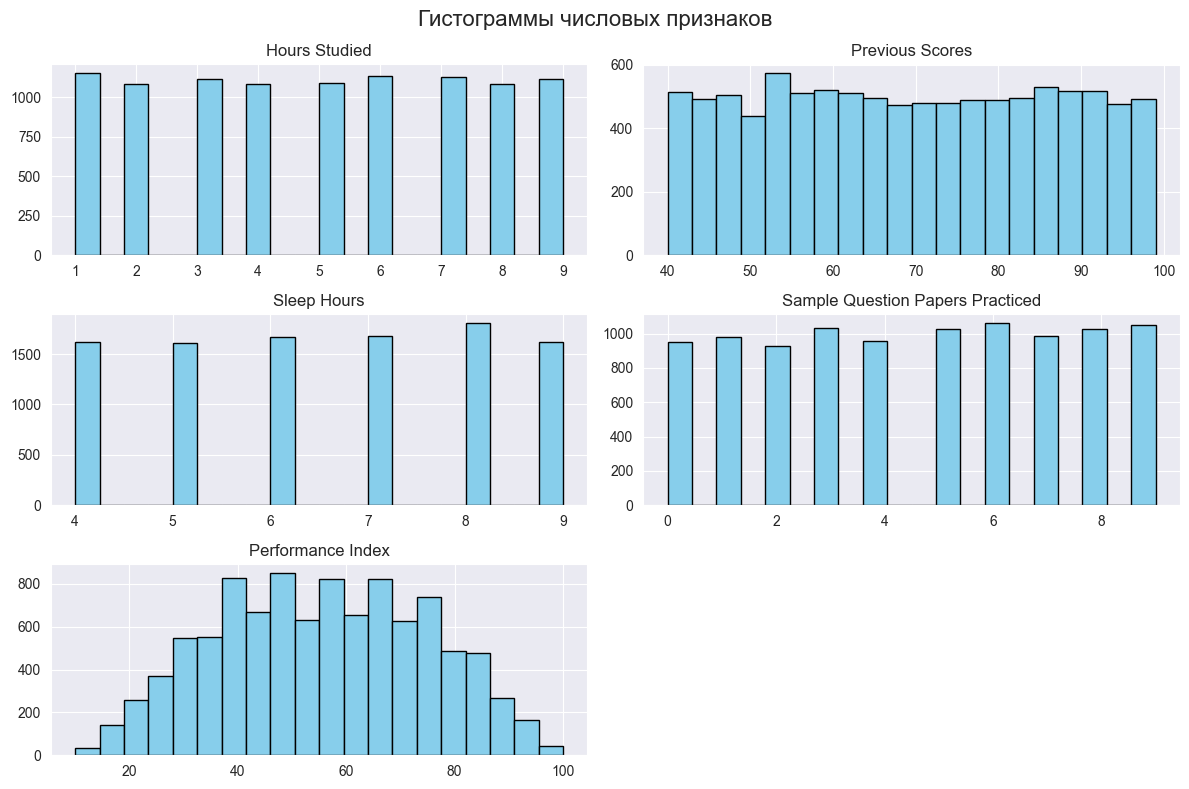

In [98]:
data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Гистограммы числовых признаков", fontsize=16)
plt.tight_layout()
plt.show()

И график распределения для переменной 'Extracurricular Activities':

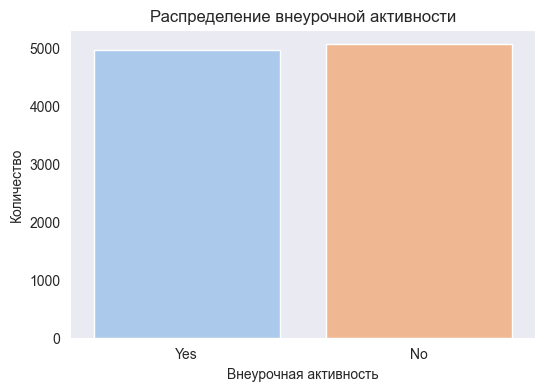

In [99]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Extracurricular Activities', hue='Extracurricular Activities', palette='pastel', legend=False)
plt.title("Распределение внеурочной активности")
plt.ylabel("Количество")
plt.xlabel("Внеурочная активность")
plt.grid(axis='y')
plt.show()

Рассмотрим средний Performance Index в зависимости от Extracurricular Activities:

In [100]:
data.groupby('Extracurricular Activities')['Performance Index'].mean()

Extracurricular Activities
No     54.758511
Yes    55.700889
Name: Performance Index, dtype: float64

Построим boxplot для всех числовых переменных:

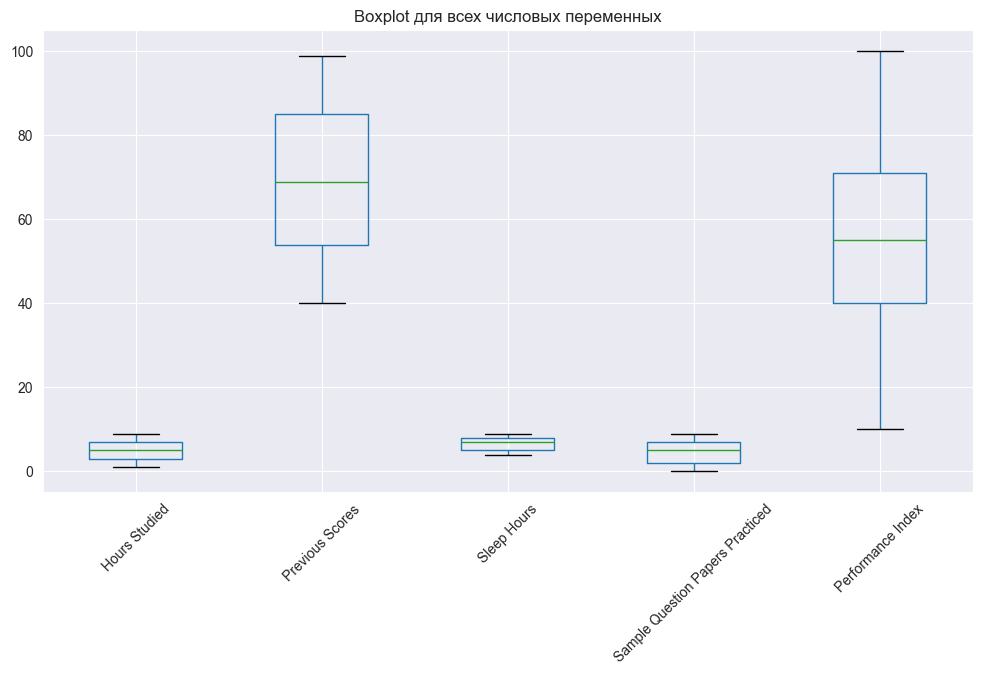

In [101]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title("Boxplot для всех числовых переменных")
plt.xticks(rotation=45)
plt.show()

Построим средние значения для каждого числового столбца.

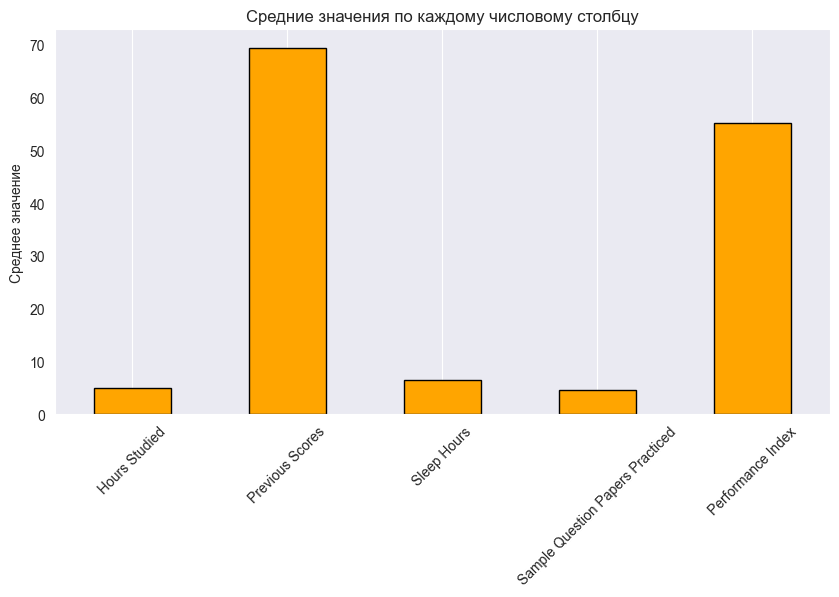

In [102]:
means = data.mean(numeric_only=True)

plt.figure(figsize=(10, 5))
means.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Средние значения по каждому числовому столбцу")
plt.ylabel("Среднее значение")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Построим стандартное отклонение для каждого числового столбца.

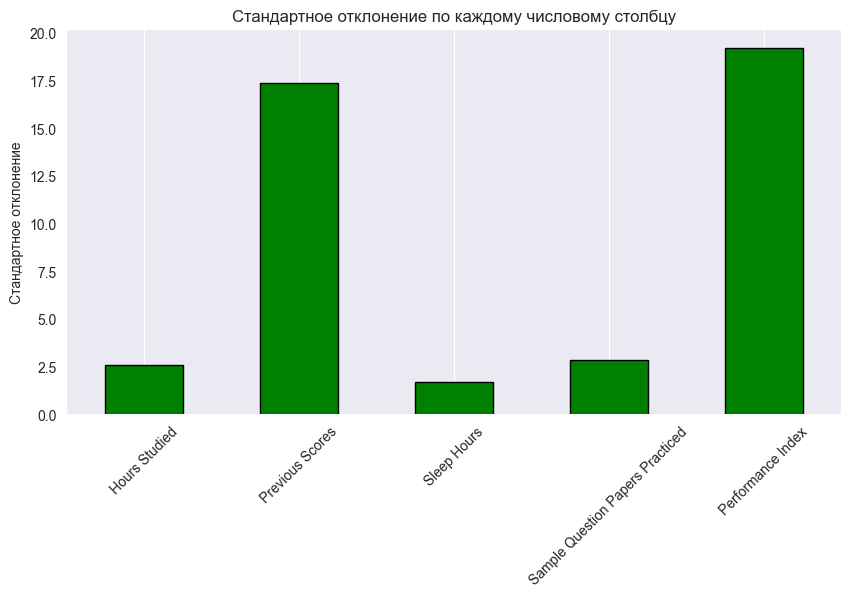

In [103]:
stds = data.std(numeric_only=True)

plt.figure(figsize=(10, 5))
stds.plot(kind='bar', color='green', edgecolor='black')
plt.title("Стандартное отклонение по каждому числовому столбцу")
plt.ylabel("Стандартное отклонение")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.

Посмотрим, есть ли пропущенные значения.

In [104]:
print(data.isnull().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


Пропущенных значений нет, поэтому можно перейти к кодированию категориальных признаков.

У нас есть столбец с Yes/No, который надо преобразовать в числа:

In [105]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
data = data.dropna()

data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Выполним нормализацию числовых признаков с помощью Min-Max нормализации:

$$ X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}} $$

In [106]:
EPSILON = 1e-8

data_normalized = data.copy()

for col in data_normalized.columns:
    col_min = data_normalized[col].min()
    col_max = data_normalized[col].max()
    data_normalized[col] = (data_normalized[col] - col_min) / (col_max - col_min + EPSILON)

data_normalized.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1.0,1.0,0.111111,0.900000
1,0.375,0.711864,0.0,0.0,0.222222,0.611111
2,0.875,0.186441,1.0,0.6,0.222222,0.388889
3,0.500,0.203390,1.0,0.2,0.222222,0.288889
4,0.750,0.593220,0.0,0.8,0.555556,0.622222


#### Разделите данные на обучающий и тестовый наборы данных.

In [107]:
shuffled = data_normalized.sample(frac=1, random_state=42).reset_index(drop=True)
n_total = len(shuffled)
n_train = int(n_total * 0.8)

train_data = shuffled.iloc[:n_train]
test_data = shuffled.iloc[n_train:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (8000, 6)
Test shape: (2000, 6)


#### Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.


Для регрессии с добавленным столбцом единиц для свободного члена, матрица признаков X выглядит как:

$$ X = \begin{bmatrix}
1 & x_1 & x_2 & \dots & x_n \\
1 & x_1' & x_2' & \dots & x_n' \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)} \\
\end{bmatrix}
$$

Для нахождения коэффициентов ${\beta}$ используется метод наименьших квадратов, который решается через нормальные уравнения:

$$ {\beta} = (X^T X)^{-1} X^Ty $$
где $X^T$ - транспонированная матрица признаков, $X^TX$ - матрица Грама, $y$ - вектор наблюдаемых значений целевой переменной, а ${\beta}$ - вектор коэффициентов регрессии.

Для предсказания значений целевой переменной $y$ для новых данных $X'$ используется формула:

$$ \hat{y} = X' \beta $$
где $\hat{y}$ — предсказанные значения целевой переменной для новых данных.

Коэффициент детерминации $$R^2$$ вычисляется по формуле:

$$
R^2 = 1 - \frac{\sum_{i=1}^m (y_i - \hat{y}_i)^2}{\sum_{i=1}^m (y_i - \bar{y})^2}
$$

где $y_i$ — фактические значения целевой переменной, $\hat{y}_i$ — предсказанные значения, $\bar{y}$ — среднее значение фактических наблюдений, а $m$ — количество наблюдений.

Сумма квадратов ошибок (SSE) вычисляется по формуле:

$$
\text{SSE} = \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$
где $y_i$ — фактические значения целевой переменной, $\hat{y}_i$ — предсказанные значения, а $m$ — количество наблюдений.

Напишем класс для линейной регрессии с использованием метода наименьших квадратов.

In [108]:
class LinearRegressionLS:
    def __init__(self, feature_names):
        self.coefficients = None
        self.feature_names = feature_names

    def _prepare_matrix(self, data):
        features = np.array(data[self.feature_names])
        ones = np.ones((features.shape[0], 1))
        return np.hstack([ones, features])

    def fit(self, X, y):
        X_mat = self._prepare_matrix(X)
        y_vec = np.array(y).reshape(-1, 1)
        xtx = X_mat.T.dot(X_mat)
        xty = X_mat.T.dot(y_vec)
        self.coefficients = np.linalg.solve(xtx, xty).flatten()

    def predict(self, X):
        X_mat = self._prepare_matrix(X)
        return X_mat.dot(self.coefficients)

    def r2_score(self, y_true, y_pred):
        mean_y = np.mean(y_true)
        total_variance = np.sum((y_true - mean_y) ** 2)
        residual_variance = np.sum((y_true - y_pred) ** 2)
        return 1 - residual_variance / total_variance

    def sum_squared_error(self, y_true, y_pred):
        return np.sum((y_true - y_pred) ** 2)


#### Постройте три модели с различными наборами признаков.
Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.


Построим и оценим модели.

In [109]:
target_col = 'Performance Index'

feature_sets = [
    ['Hours Studied', 'Previous Scores'],
    ['Hours Studied', 'Previous Scores', 'Extracurricular Activities'],
    ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
]

for i, features in enumerate(feature_sets, 1):
    print(f"Модель {i}: признаки = {features}")
    model = LinearRegressionLS(features)

    model.fit(train_data[features], train_data[target_col])
    y_pred = model.predict(test_data[features])
    y_true = test_data[target_col].values

    r2 = model.r2_score(y_true, y_pred)
    sse = model.sum_squared_error(y_true, y_pred)

    print(f"Коэффициент детерминации (R^2): {r2:.4f}")
    print(f"Сумма квадратов ошибок (SSE): {sse:.4f}")
    print(f"Предсказания:\n{y_pred}\n")

Модель 1: признаки = ['Hours Studied', 'Previous Scores']
Коэффициент детерминации (R^2): 0.9862
Сумма квадратов ошибок (SSE): 1.2783
Предсказания:
[0.57011201 0.76724736 0.13734544 ... 0.38660098 0.12147495 0.14187052]

Модель 2: признаки = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities']
Коэффициент детерминации (R^2): 0.9864
Сумма квадратов ошибок (SSE): 1.2561
Предсказания:
[0.57337268 0.77048245 0.14062033 ... 0.38332685 0.11825712 0.13864623]

Модель 3: признаки = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
Коэффициент детерминации (R^2): 0.9888
Сумма квадратов ошибок (SSE): 1.0330
Предсказания:
[0.59113012 0.75642269 0.12182391 ... 0.388844   0.12128236 0.13912334]



#### Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.


Результаты показывают, что все три модели хорошо объясняют вариативность целевой переменной, что подтверждается высокими значениями коэффициента детерминации (R^2 выше 0.98). При добавлении признаков, особенно в третьей модели, наблюдается небольшое, но заметное улучшение — R^2 выросла до 0.9888, а сумма квадратов ошибок (SSE) снизилась, что говорит о более точных предсказаниях. Таким образом, расширение набора признаков положительно влияет на качество модели, но при этом прирост становится менее значительным, что может свидетельствовать о некотором насыщении модели информацией.

Hours Studied и Previous Scores — самые важные и информативные признаки. Они сильно коррелируют с итоговым показателем Performance Index и объясняют почти всю его вариативность.

Extracurricular Activities оказывает небольшое положительное влияние, но он менее значим, чем первые два. Возможно, участие в активности немного связано с общей успеваемостью, но не является решающим фактором.

Добавление признаков Sleep Hours и Sample Question Papers Practiced привело к заметному снижению ошибок. Это говорит о том, что эти факторы также вносят вклад в объяснение вариативности Performance Index, хотя и в меньшей степени по сравнению с основными признаками.
